#### 数据分析
使用房屋的数据集，清洗数据，把房屋面积缩小10倍，房价扩大10倍处理。

使用numpy , pandas, matplotlib综合应用，完成如下可视图：


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']

##### 第一张图

In [ ]:
data = pd.read_csv('data/房屋交易数据集.csv',engine='python',encoding='gbk')
data[:13]

In [ ]:
area = data['面积'] * 0.1
price = data['价格'] * 10

In [ ]:
plt.scatter(area, price,alpha=0.1)
plt.xlabel('房屋面积')
plt.ylabel('房价')
plt.ticklabel_format(axis='y', style='plain')  # 禁用科学计数法
plt.show()

##### 第二张图

In [ ]:
data["价格"] = data["价格"]*10
data["面积"] = data["面积"]*0.1

In [ ]:
data = data.groupby(['区域', '交易月份'])[['价格','面积']].sum().reset_index()
moon = data["交易月份"].unique()

In [ ]:
data["单价"] = data["价格"] / data["面积"]
data.head()

In [ ]:
data[data["区域"]=="古城区"]["价格"].values

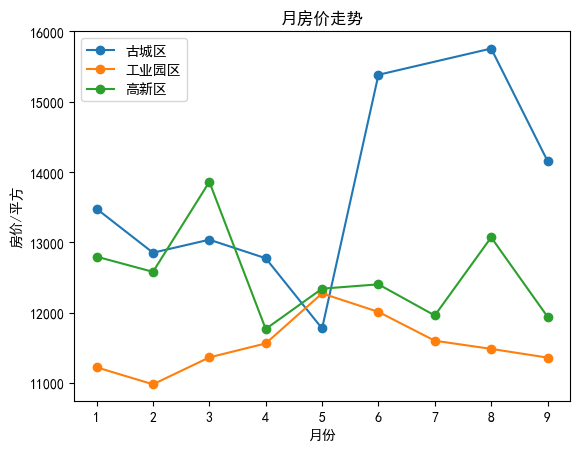

In [21]:
plt.plot(data[data["区域"]=="古城区"]["交易月份"].values, data[data["区域"]=="古城区"]["单价"].values,'o-')
plt.plot(data[data["区域"]=="工业园区"]["交易月份"].values, data[data["区域"]=="工业园区"]["单价"].values,'o-')
plt.plot(data[data["区域"]=="高新区"]["交易月份"].values, data[data["区域"]=="高新区"]["单价"].values,'o-')

plt.xlabel("月份")
plt.ylabel("房价/平方")
plt.title("月房价走势")
plt.legend(["古城区","工业园区","高新区"])
plt.ylim(top=16000)
plt.show()

#### PAT-1071

In [ ]:
T, K = input().split()
T = int(T)
K = int(K)

for i in range(K):
    n1, b, t, n2 = map(int, input().split())
    if T == 0:
        print('Game Over.')
        break
    if t > T:
        print(f'Not enough tokens. Total = {T}.')
        continue
    if n1 < n2:
        if b == 0:
            print(f'Lose {t}. Total = {T - t}.')
            T -= t
        else:
            print(f'Win {t}! Total = {T + t}.')
            T += t
    else:
        if b == 0:
            print(f'Win {t}! Total = {T + t}.')
            T += t
        else:
            print(f'Lose {t}. Total = {T - t}.')
            T -= t



#### PAT-1072

#### PAT-1040